/tmp/ipython-input-3016331208.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Initial Cost:",float(J))
/tmp/ipython-input-3016331208.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history.append(float(J))


Initial Cost: 0.6931471785599455
Final Weights:
 [[1.66661618]
 [7.86606051]
 [5.6538977 ]]
Final Cost: 0.015539112524811504

Survival Probability: 1.0
Prediction: SURVIVE


/tmp/ipython-input-3016331208.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\nSurvival Probability:",float(h_test))


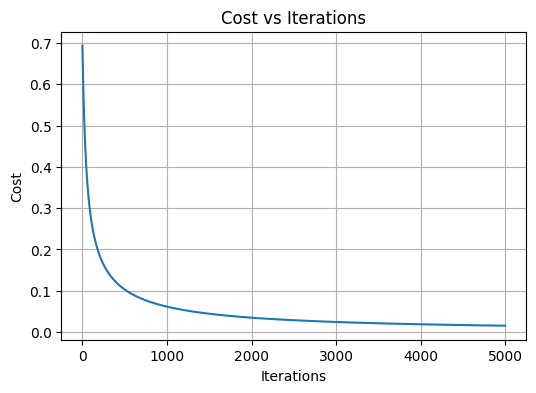

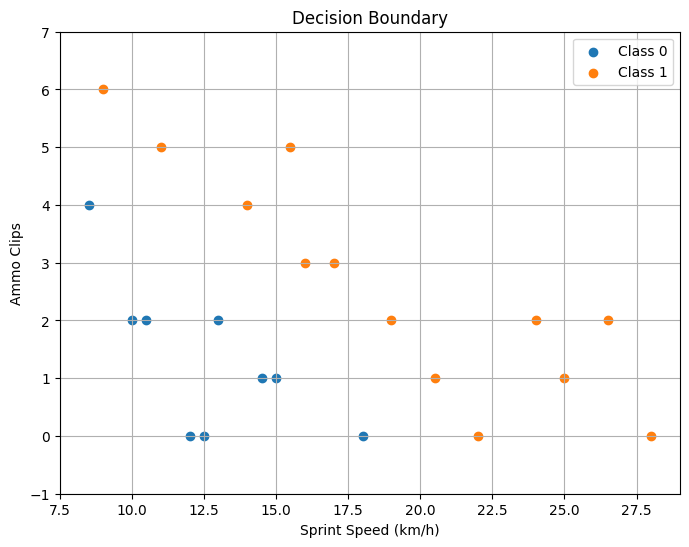

In [26]:
import numpy as np
import matplotlib.pyplot as plt


sp=[12,14.5,10,18,8.5,15,22,11,13,20.5,24,16,12.5,28,9,25,14,19,10.5,26.5,15.5,17]
ac=[0,1,2,0,4,1,0,5,2,1,2,3,0,0,6,1,4,2,2,2,5,3]
res=[0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1]

arr1=np.array(sp)
arr1=(arr1-arr1.mean())/arr1.std()
arr2=np.array(ac)
arr2=(arr2-arr2.mean())/arr2.std()
arr3=np.array(res)
n=len(arr1)

X=np.hstack([np.ones((n,1)),arr1.reshape(n,1),arr2.reshape(n,1)])
y=arr3.reshape(n,1)
w=np.zeros((3,1))

z=X.dot(w)
h=1/(1+np.exp(-z))
J=-(1/n)*(y.T.dot(np.log(h+1e-9))+(1-y).T.dot(np.log(1-h+1e-9)))
print("Initial Cost:",float(J))

lr=0.1
epochs=5000
cost_history=[]

for i in range(epochs):
    z=X.dot(w)
    h=1/(1+np.exp(-z))
    J=-(1/n)*(y.T.dot(np.log(h+1e-9))+(1-y).T.dot(np.log(1-h+1e-9)))
    cost_history.append(float(J))
    grad=(1/n)*X.T.dot(h-y)
    w=w-lr*grad

print("Final Weights:\n",w)
print("Final Cost:",cost_history[-1])

test_speed=25
test_ammo=1

ts=(test_speed-arr1.mean())/arr1.std()
ta=(test_ammo-arr2.mean())/arr2.std()

x_test=np.array([1,ts,ta]).reshape(1,3)
z_test=x_test.dot(w)
h_test=1/(1+np.exp(-z_test))

print("\nSurvival Probability:",float(h_test))
print("Prediction:", "SURVIVE" if h_test>=0.5 else "INFECTED")


plt.figure(figsize=(6,4))
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))

# Scatter original data
for label in [0,1]:
    idx = np.where(arr3==label)
    plt.scatter(np.array(sp)[idx], np.array(ac)[idx], label=f"Class {label}")

# Grid in original scale
speed_vals = np.linspace(min(sp)-1, max(sp)+1, 500)
ammo_vals = np.linspace(min(ac)-1, max(ac)+1, 500)
xx, yy = np.meshgrid(speed_vals, ammo_vals)

# Normalize grid for prediction
xx_n = (xx - arr1.mean())/arr1.std()
yy_n = (yy - arr2.mean())/arr2.std()

# Predict probabilities
grid = np.c_[np.ones(xx_n.size), xx_n.ravel(), yy_n.ravel()]
probs = 1/(1 + np.exp(-grid.dot(w)))
probs = probs.reshape(xx.shape)

# Contour at 0.5
plt.contour(xx, yy, probs, levels=[0.5], colors='red', linewidths=2)

plt.xlabel("Sprint Speed (km/h)")
plt.ylabel("Ammo Clips")
plt.title("Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()